In [1]:
from reactionmodel.model import Species, Reaction, Model
import numpy as np
from numba import jit

X = Species('X')

@jit(nopython=True)
def k(t):
    return np.array([t])

r = Reaction([X], [], k=k)

m = Model([X], [r])

In [2]:
import hybrid.parse as parse

sf = parse.PreconfiguredSimulatorLoader.load_preconfigured('hr_original')
simulator = sf.make_simulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
)

In [3]:
x0 = 1000
t = np.linspace(0.0, 5.0, 51)
result = simulator.simulate([0.0, 5.0], [x0], rng=np.random.default_rng(), t_eval=t)
result.status_counter

Counter({<HybridStepStatus.stochastic_event: 1>: 58,
         <HybridStepStatus.contrived_no_reaction: 4>: 48,
         <HybridStepStatus.t_end: 0>: 1})

In [4]:
result.restricted_values(t)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 array([[1000.        ,  995.43448248,  980.61439537,  956.33518033,
          923.44229126,  882.80871334,  835.84782375,  783.60944677,
          727.26866633,  668.05557295,  607.53831047,  546.8283491 ,
          487.15770728,  429.91516056,  375.83160542,  325.08527418,
          278.40796592,  235.77133117,  196.63172681,  164.44870407,
          135.27614641,  109.50799118,   88.31784803,   70.52474828,
           58.        ,   47.        ,   35.        ,   28.        ,
           21.        ,   14.        ,   10.        ,    5.        ,
            4.        ,    3.        ,    2.        ,    1.        ,
            1.        ,    0.        ,    0.        ,    0.        ,
            0.       

In [5]:
from hybrid.hybrid import HybridStepStatus
HybridStepStatus(4)

<HybridStepStatus.contrived_no_reaction: 4>

[]

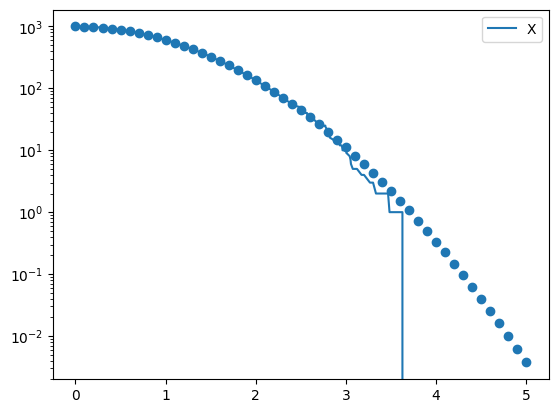

In [6]:
import matplotlib.pyplot as plt
ax = plt.subplot()

result.plot(m.legend(), ax=ax)
y = x0*np.exp(-1/2 * t**2)
ax.scatter(t, y)
ax.semilogy()

# Implicit tau leaping

In [7]:
from hybrid.tau import TauLeapSimulator

ts = TauLeapSimulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
    method='implicit'
)

In [8]:
ts.method

<Method.implicit: 'implicit'>

In [9]:
result = ts.simulate([0.0, 5.0], [x0], rng=np.random.default_rng(), t_eval=t)
result.status_counter

/Users/thayer/develop/hybrid/hybrid/tau.py:217: RuntimeWarning: divide by zero encountered in divide
  tau2 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1)**2 / np.abs(sigma_2_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:342: RuntimeWarning: divide by zero encountered in scalar divide
  if tau_prime < self.rejection_multiple / total_propensity:


Counter({<TauStepStatus.rejected_for_gillespie: -2>: 1,
         <TauStepStatus.gillespie_t_end: 2>: 1})

[]

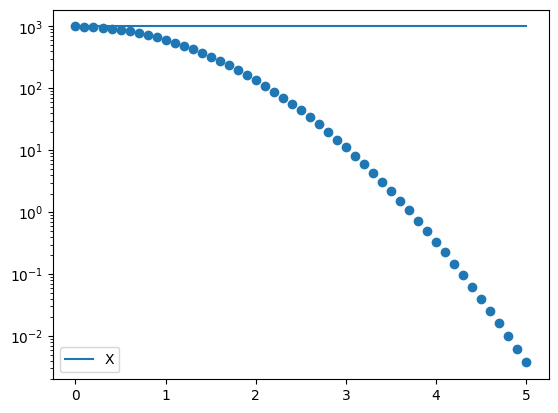

In [10]:
import matplotlib.pyplot as plt
ax = plt.subplot()

result.plot(m.legend(), ax=ax)
y = x0*np.exp(-1/2 * t**2)
ax.scatter(t, y)
ax.semilogy()